In [29]:
import re
from typing import List, Set

import pythonbible as bible
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# pythonbible Exploration

In [38]:
bible.get_references("Genesis 1; Genesis 2")

[NormalizedReference(book=<Book.GENESIS: 1>, start_chapter=1, start_verse=1, end_chapter=1, end_verse=31, end_book=None),
 NormalizedReference(book=<Book.GENESIS: 1>, start_chapter=2, start_verse=1, end_chapter=2, end_verse=25, end_book=None)]

In [ ]:
bible.Book.GENESIS

<Book.GENESIS: 1>

In [32]:
bible.get_number_of_chapters(bible.Book.GENESIS)

50

In [33]:
bible.get_number_of_verses(bible.Book.GENESIS, 1)

31

In [42]:
f"{bible.Book.GENESIS.name}"

'GENESIS'

In [53]:
bible.get_references("Genesis 17")

[NormalizedReference(book=<Book.GENESIS: 1>, start_chapter=17, start_verse=1, end_chapter=17, end_verse=28, end_book=None)]

In [54]:
BOOK: bible.Book = bible.Book.GENESIS

book_text: str = ""
for chapter_id in range(1, bible.get_number_of_chapters(BOOK)+1):
    book_chapter: str = f"{BOOK.name} {chapter_id}"
    print(book_chapter)
    for verse_id in bible.convert_reference_to_verse_ids(bible.get_references(book_chapter)[0]):
        try:
            book_text += " " + bible.get_verse_text(verse_id=verse_id)
        except bible.errors.VersionMissingVerseError as e:
            print(e)
        except Exception as e:
            raise(e)

GENESIS 1
GENESIS 2
GENESIS 3
GENESIS 4
GENESIS 5
GENESIS 6
GENESIS 7
GENESIS 8
GENESIS 9
GENESIS 10
GENESIS 11
GENESIS 12
GENESIS 13
GENESIS 14
GENESIS 15
GENESIS 16
GENESIS 17
ASV is missing verse 1017028.
GENESIS 18
ASV is missing verse 1018034.
GENESIS 19
GENESIS 20
ASV is missing verse 1020019.
GENESIS 21
GENESIS 22
GENESIS 23
GENESIS 24
GENESIS 25
GENESIS 26
GENESIS 27
GENESIS 28
GENESIS 29
GENESIS 30
GENESIS 31
GENESIS 32
GENESIS 33
GENESIS 34
GENESIS 35
GENESIS 36
GENESIS 37
GENESIS 38
ASV is missing verse 1038031.
ASV is missing verse 1038032.
GENESIS 39
ASV is missing verse 1039024.
ASV is missing verse 1039025.
ASV is missing verse 1039026.
ASV is missing verse 1039027.
GENESIS 40
ASV is missing verse 1040024.
ASV is missing verse 1040025.
GENESIS 41
ASV is missing verse 1041058.
ASV is missing verse 1041059.
GENESIS 42
ASV is missing verse 1042039.
GENESIS 43
GENESIS 44
GENESIS 45
GENESIS 46
GENESIS 47
GENESIS 48
GENESIS 49
ASV is missing verse 1049034.
ASV is missing verse

In [59]:
print(book_text[:1000])

 In the beginning God created the heavens and the earth. And the earth was waste and void; and darkness was upon the face of the deep: and the Spirit of God moved upon the face of the waters. And God said, Let there be light: and there was light. And God saw the light, that it was good: and God divided the light from the darkness. And God called the light Day, and the darkness he called Night. And there was evening and there was morning, one day. And God said, Let there be a firmament in the midst of the waters, and let it divide the waters from the waters. And God made the firmament, and divided the waters which were under the firmament from the waters which were above the firmament: and it was so. And God called the firmament Heaven. And there was evening and there was morning, a second day. And God said, Let the waters under the heavens be gathered together unto one place, and let the dry land appear: and it was so. And God called the dry land Earth; and the gathering together of th

# NLTK Bible

In [3]:
BOOK: bible.Book = bible.Book.GENESIS

book_text: str = ""
for chapter_id in range(1, bible.get_number_of_chapters(BOOK)+1):
    book_chapter: str = f"{BOOK.name} {chapter_id}"
    for verse_id in bible.convert_reference_to_verse_ids(bible.get_references(book_chapter)[0]):
        try:
            book_text += " " + bible.get_verse_text(verse_id=verse_id)
        except bible.errors.VersionMissingVerseError as e:
            print(e)
        except Exception as e:
            raise(e)

ASV is missing verse 1017028.
ASV is missing verse 1018034.
ASV is missing verse 1020019.
ASV is missing verse 1038031.
ASV is missing verse 1038032.
ASV is missing verse 1039024.
ASV is missing verse 1039025.
ASV is missing verse 1039026.
ASV is missing verse 1039027.
ASV is missing verse 1040024.
ASV is missing verse 1040025.
ASV is missing verse 1041058.
ASV is missing verse 1041059.
ASV is missing verse 1042039.
ASV is missing verse 1049034.
ASV is missing verse 1049035.
ASV is missing verse 1049036.


In [60]:
print(book_text[:1000])

 In the beginning God created the heavens and the earth. And the earth was waste and void; and darkness was upon the face of the deep: and the Spirit of God moved upon the face of the waters. And God said, Let there be light: and there was light. And God saw the light, that it was good: and God divided the light from the darkness. And God called the light Day, and the darkness he called Night. And there was evening and there was morning, one day. And God said, Let there be a firmament in the midst of the waters, and let it divide the waters from the waters. And God made the firmament, and divided the waters which were under the firmament from the waters which were above the firmament: and it was so. And God called the firmament Heaven. And there was evening and there was morning, a second day. And God said, Let the waters under the heavens be gathered together unto one place, and let the dry land appear: and it was so. And God called the dry land Earth; and the gathering together of th

In [67]:
stemmer: nltk.stem.PorterStemmer = nltk.stem.PorterStemmer()
lemmatizer: nltk.WordNetLemmatizer = nltk.WordNetLemmatizer()

In [66]:
stemmer.stem("created")

'creat'

In [69]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abevallerian/nltk_data...


True

In [72]:
lemmatizer.lemmatize("said", pos="v")

'say'

# Functions

In [83]:
class BookGenerator:
    def __init__(self, book: bible.Book):
        self.book: bible.Book = book
        self.nlp: spacy.lang.en.English = spacy.load("en_core_web_trf")
        self.raw_book_text: str = ""
        self.clean_text: str = ""
        self.tokenized_text: List[str] = []
        self.final_text: str = ""
        self.stopwords: Set = set(STOPWORDS)
        self.stopwords.update([
            "hast"
            "hath",
            "may",
            "say",
            "shalt",
            "thee",
            "thereof",
            "thou",
            "thy",
            "unto",
            "upon",
            "will",
            "ye"
        ])


        self.generate_book_text(self.book)
        self.preprocess_book_text(self.raw_book_text)
    
    def generate_book_text(self, book: bible.Book) -> str:
        print(f"generating {book.name}")
        for chapter_id in range(1, bible.get_number_of_chapters(book)+1):
            book_chapter: str = f"{book.name} {chapter_id}"
            for verse_id in bible.convert_reference_to_verse_ids(bible.get_references(book_chapter)[0]):
                try:
                    self.raw_book_text += " " + bible.get_verse_text(verse_id=verse_id)
                except bible.errors.VersionMissingVerseError as e:
                    print(e)
                except Exception as e:
                    raise(e)
        return self.raw_book_text,

    def preprocess_book_text(self, text: str) -> str:
        self.clean_text= re.sub("[^0-9a-zA-Z ]+", "", text.lower())
        self.tokenized_text = [token.lemma_ for token in self.nlp(self.clean_text)]
        self.final_text = re.sub(r"\s+", " ", " ".join(self.tokenized_text)).strip()
        return self.final_text
    
    def generate_word_cloud(self, max_words: int = 100) -> WordCloud:
        self.wordcloud: WordCloud = WordCloud(
            stopwords=self.stopwords,
            collocations=False,
            background_color="white",
            max_words=max_words
        )
        self.wordcloud.generate(self.final_text)

        plt.imshow(self.wordcloud)
        plt.axis("off")
        plt.show()

        return self.wordcloud

# Genesis

generating GENESIS
ASV is missing verse 1017028.
ASV is missing verse 1018034.
ASV is missing verse 1020019.
ASV is missing verse 1038031.
ASV is missing verse 1038032.
ASV is missing verse 1039024.
ASV is missing verse 1039025.
ASV is missing verse 1039026.
ASV is missing verse 1039027.
ASV is missing verse 1040024.
ASV is missing verse 1040025.
ASV is missing verse 1041058.
ASV is missing verse 1041059.
ASV is missing verse 1042039.
ASV is missing verse 1049034.
ASV is missing verse 1049035.
ASV is missing verse 1049036.


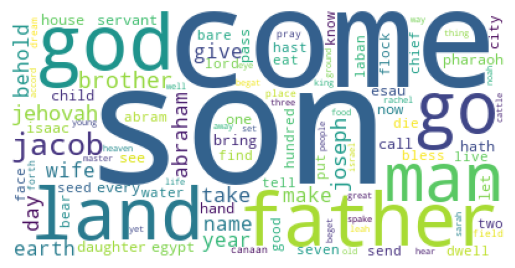

In [84]:
genesis: BookGenerator = BookGenerator(bible.Book.GENESIS)
genesis.generate_word_cloud()

generating EXODUS
ASV is missing verse 2028044.


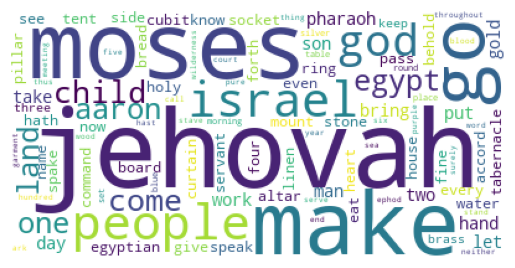

In [85]:
exodus: BookGenerator = BookGenerator(bible.Book.EXODUS)
exodus.generate_word_cloud()

generating DANIEL
ASV is missing verse 27003031.
ASV is missing verse 27003032.
ASV is missing verse 27003033.
ASV is missing verse 27003034.
ASV is missing verse 27003035.
ASV is missing verse 27003036.
ASV is missing verse 27003037.
ASV is missing verse 27003038.
ASV is missing verse 27003039.
ASV is missing verse 27003040.
ASV is missing verse 27003041.
ASV is missing verse 27003042.
ASV is missing verse 27003043.
ASV is missing verse 27003044.
ASV is missing verse 27003045.
ASV is missing verse 27003046.
ASV is missing verse 27003047.
ASV is missing verse 27003048.
ASV is missing verse 27003049.
ASV is missing verse 27003050.
ASV is missing verse 27003051.
ASV is missing verse 27003052.
ASV is missing verse 27003053.
ASV is missing verse 27003054.
ASV is missing verse 27003055.
ASV is missing verse 27003056.
ASV is missing verse 27003057.
ASV is missing verse 27003058.
ASV is missing verse 27003059.
ASV is missing verse 27003060.
ASV is missing verse 27003061.
ASV is missing verse 

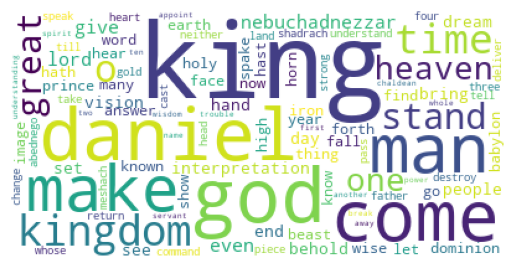

In [86]:
daniel: BookGenerator = BookGenerator(bible.Book.DANIEL)
daniel.generate_word_cloud()

generating MATTHEW


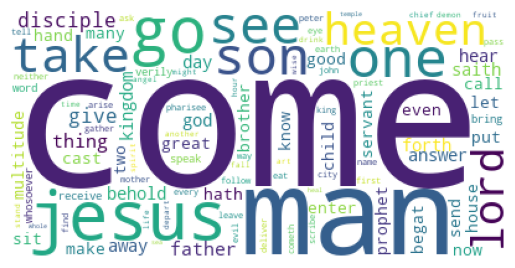

In [87]:
matthew: BookGenerator = BookGenerator(bible.Book.MATTHEW)
matthew.generate_word_cloud()

generating REVELATION
ASV is missing verse 66012018.
ASV is missing verse 66013019.


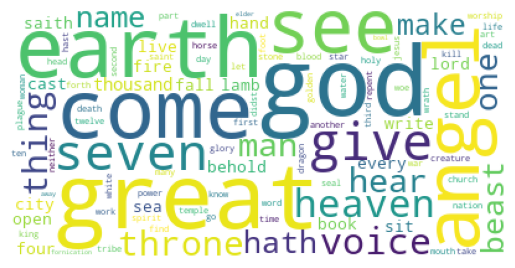

In [88]:
revelation: BookGenerator = BookGenerator(bible.Book.REVELATION)
revelation.generate_word_cloud()